# Task

## Task 1: 

In tutorial 11, we used feed forward neural network to forecast the time series. We used one hidden layer with 20 neurons. Now train this network with two hidden layers. Explore following two cases.

- Case 1: Each hidden layer will have 10 neurons
- Case 2: First hidden layer will have 14 neurons and the second hidden layer will have 6 neurons. Check train and test error for both cases and compare that with the implementation in the tutorial.

First, let's load the libraries we will use for the tasks

In [2]:
#%% Import library
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

We then load the data and repeat the data pre-processing, data reconstruction and train/test split steps as we did in Tutorial 11.

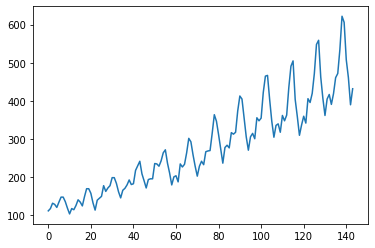

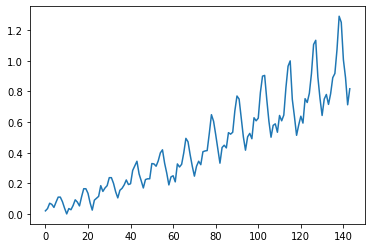

In [4]:
# Let us load data 
data_not_scaled = pd.read_csv('AirPassengers.csv', usecols=[1])
data_not_scaled = data_not_scaled.dropna()  # Drop all Nans
data_not_scaled = data_not_scaled.values  # Convert from DataFrame to Python Array
data_not_scaled=data_not_scaled.astype('float') # You need to make sure the data is type of float

plt.figure()
plt.plot(data_not_scaled)

#%%
# Prepare data for training a feed forward neuron network

""" Scaling ...
Neural networks normally work well with scaled data, especially when we use
the sigmoid or tanh activation function. It is a good practice to scale the
data to the range of 0-to-1. This can be easily done by using scikit-learn's 
MinMaxScaler 
"""
time_window = 12 #this is 
scaler = MinMaxScaler(feature_range=(0, 1))
train_size = int((len(data_not_scaled)-time_window) * 0.8)
test_size = len(data_not_scaled) - train_size-time_window

# Fitting the scaler
fitted_transformer = scaler.fit(data_not_scaled[:train_size+time_window])

# Transforming using trained scaler
data=fitted_transformer.transform(data_not_scaled)
plt.figure()
plt.plot(data)

#%%

"""  Splitting ...
We are going to use a time lag p = 12, so we will split the time series as
    [FEATURES]             TARGET (PREDICTION)
   [x_1, x_2, ..., x_12],    x_13
   [x_2, x_3, ..., x_13],    x_14
   [x_3, x_4, ..., x_14],    x_15 
   ....
""" 
# =============================================================================
# time_window = 12
# =============================================================================

Xall, Yall = [], []
Xall_not_scaled, Yall_not_scaled = [], []

for i in range(time_window, len(data)):
    Xall.append(data[i-time_window:i, 0])
    Xall_not_scaled.append(data_not_scaled[i-time_window:i, 0])
    Yall.append(data[i, 0])
    Yall_not_scaled.append(data_not_scaled[i, 0])

Xall = np.array(Xall)    # Convert them from list to array   
Yall = np.array(Yall)
Xall_not_scaled = np.array(Xall_not_scaled)
Yall_not_scaled = np.array(Yall_not_scaled)


Xtrain = Xall[:train_size, :]
Ytrain = Yall[:train_size]

Xtest = Xall[-test_size:, :]
Ytest = Yall[-test_size:]

Since we will run NN with different sizes of the two hidden layers, it is useful to define a function with inputs representing the sizes and output is the model object. 

In [5]:
# Define a custom function to easily change the network setting
def model_definer(nn_layer1, nn_layer2):
    model = Sequential()
    model.add(Dense(nn_layer1, input_dim=time_window, activation='relu'))  # sigmoid
    model.add(Dense(nn_layer2, input_dim=time_window, activation='relu'))  # sigmoid
    #model.add(Dense(20, activation='sigmoid'))  # relu
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')   #adam
    return model

#### Case 1: 10, 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 2/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0138
Epoch 3/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 4/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0108
Ep

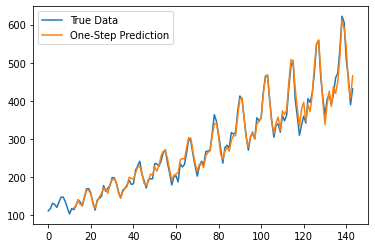

In [6]:
model_10_10 = model_definer(10,10)

# Get the paparemter numbers of the model
model_10_10.summary()

# Training
model_10_10.fit(Xtrain, Ytrain,  epochs=500, batch_size=5, verbose=1)

# One-step, in sample prediction
allPredict = model_10_10.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window, len(data)),allPredictPlot, label='One-Step Prediction') 
plt.legend()

# Calculating train and test score on scaled data
trainScore = math.sqrt(mean_squared_error(Ytrain, allPredict[:train_size,0]))
print('Training Data RMSE: {0:.2f}'.format(trainScore))
testScore = math.sqrt(mean_squared_error(Ytest, allPredict[train_size:,0]))
print('Test Data RMSE: {0:.2f}'.format(testScore))

# Calculating train and test score on transformed data
trainScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[:train_size],
                                                     allPredictPlot[:train_size,0]))
print('Training Data RMSE after transformation: {0:.2f}'.format(trainScore_not_scaled))
testScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[train_size:],
                                                     allPredictPlot[train_size:,0]))
print('Test Data RMSE after transformation: {0:.2f}'.format(testScore_not_scaled))

#### Case 1: 14, 6

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 14)                182       
                                                                 
 dense_4 (Dense)             (None, 6)                 90        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
21/21 [==============================] - 0s 1ms/step - loss: 0.2457
Epoch 2/500
21/21 [==============================] - 0s 974us/step - loss: 0.0247
Epoch 3/500
21/21 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 4/500
21/21 [==============================] - 0s 1ms/step - loss: 0.006

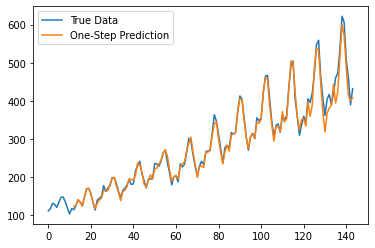

In [7]:
model_14_6 = model_definer(14,6)

# Get the paparemter numbers of the model
model_14_6.summary()

# Training
model_14_6.fit(Xtrain, Ytrain,  epochs=500, batch_size=5, verbose=1)

# One-step, in sample prediction
allPredict = model_14_6.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window, len(data)),allPredictPlot, label='One-Step Prediction') 
plt.legend()

# Calculating train and test score on scaled data
trainScore = math.sqrt(mean_squared_error(Ytrain, allPredict[:train_size,0]))
print('Training Data RMSE: {0:.2f}'.format(trainScore))
testScore = math.sqrt(mean_squared_error(Ytest, allPredict[train_size:,0]))
print('Test Data RMSE: {0:.2f}'.format(testScore))

# Calculating train and test score on transformed data
trainScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[:train_size],
                                                     allPredictPlot[:train_size,0]))
print('Training Data RMSE after transformation: {0:.2f}'.format(trainScore_not_scaled))
testScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[train_size:],
                                                     allPredictPlot[train_size:,0]))
print('Test Data RMSE after transformation: {0:.2f}'.format(testScore_not_scaled))

## Task 2 

Change the number of training epochs (`epochs`) to 500 and 1000 in both cases and then compare the result with tutorial implementation. Every time you are changing any parameter, make sure to restart the kernel. Otherwise, the training will be done on already trained model.

We simply repeat the training process in task 1 with different value of `epochs` when we fit the model. By changing the number of epochs from 500 to 1000, we want the optimizer to run with more iterations. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
21/21 [==============================] - 0s 800us/step - loss: 0.3102
Epoch 2/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1653
Epoch 3/1000
21/21 [==============================] - 0s 2ms/step - loss: 0.1077
Epoch 4/1000
21/21 [==============================] - 0s 1ms/step - loss: 0

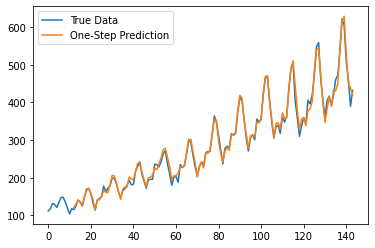

In [8]:
model_10_10 = model_definer(10,10)

# Get the paparemter numbers of the model
model_10_10.summary()

# Training
model_10_10.fit(Xtrain, Ytrain,  epochs=1000, batch_size=5, verbose=1)

# One-step, in sample prediction
allPredict = model_10_10.predict(Xall)
allPredictPlot = scaler.inverse_transform(allPredict)

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(np.arange(time_window, len(data)),allPredictPlot, label='One-Step Prediction') 
plt.legend()

# Calculating train and test score on scaled data
trainScore = math.sqrt(mean_squared_error(Ytrain, allPredict[:train_size,0]))
print('Training Data RMSE: {0:.2f}'.format(trainScore))
testScore = math.sqrt(mean_squared_error(Ytest, allPredict[train_size:,0]))
print('Test Data RMSE: {0:.2f}'.format(testScore))

# Calculating train and test score on transformed data
trainScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[:train_size],
                                                     allPredictPlot[:train_size,0]))
print('Training Data RMSE after transformation: {0:.2f}'.format(trainScore_not_scaled))
testScore_not_scaled = math.sqrt(mean_squared_error(Yall_not_scaled[train_size:],
                                                     allPredictPlot[train_size:,0]))
print('Test Data RMSE after transformation: {0:.2f}'.format(testScore_not_scaled))

## Task 3

Given the trained NN model in section 7, obtain the forecast values for out-of-sample period with the assumption that only in-sample data are observed when doing forecast. This is a multi-step-ahead forecast problem, e.g. $[\widehat{Y}_{t+1|1:t},...,\widehat{Y}_{t+h|1:t}]$

Let's use the trained NN with 2 x 10 hidden nodes for this task.

Dynamic Forecast RMSE on original scale: 46.14


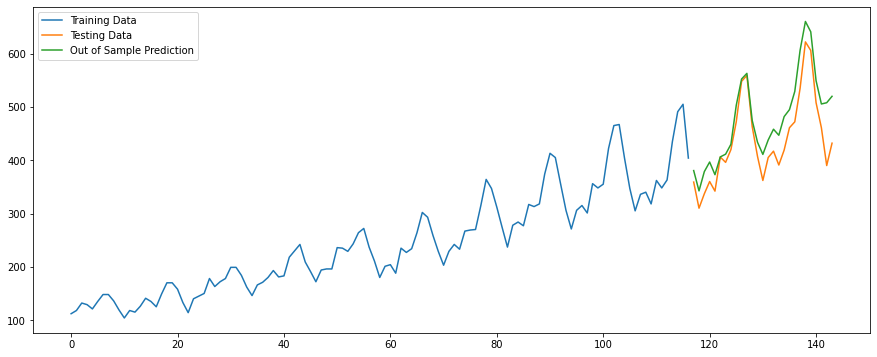

In [9]:
dynamic_prediction = np.copy(data[:len(data) - test_size])

for i in range(len(data) - test_size, len(data)):
    last_feature = np.reshape(dynamic_prediction[i-time_window:i], (1,time_window))
    next_pred = model_10_10.predict(last_feature)
    dynamic_prediction = np.append(dynamic_prediction, next_pred)

# Transform forecast values to original scale
dynamic_prediction = dynamic_prediction.reshape(-1,1)
dynamic_prediction = scaler.inverse_transform(dynamic_prediction)
    
# Plot forecast and test values
plt.figure(figsize=(15,6))
plt.plot(scaler.inverse_transform(data[:len(data) - test_size]), label='Training Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1), scaler.inverse_transform(data[-test_size:]), label='Testing Data')
plt.plot(np.arange(len(data) - test_size, len(data), 1), dynamic_prediction[-test_size:], label='Out of Sample Prediction') 
plt.legend(loc = "upper left")

# Compute RMSE on original scale
testScore_dynamic = math.sqrt(mean_squared_error(Yall_not_scaled[-test_size:], dynamic_prediction[-test_size:]))
print('Dynamic Forecast RMSE on original scale: {0:.2f}'.format(testScore_dynamic))
      